# Random forest lepton flavor study
(Sept 21, 2016)

This study was done using the the same, very simliar, set-up and methodology to what was done with TMVA over during 2015-mid2016. There are a few glaring mistakes and over sights which will be noted but not corrected in this study. The issues are outlined below. 

### Issues 

There are a few issues to note. First that the original forest was not trained on 1/3 of the mc, but ~ 1/3 of WW and the rest of the same order as the WW.  ( 50,000-WW, 70,000-DY, 33,000-TT ) More importantly when producing yeild tables the entire Monte Carlo dataset set was used, including the portion of the set which had been used for training. What worse is that only ~2/3 of the WW set was avalible. So over 50% of the data set used to test on was also used to train. :( 

Other things: 

- At this point in time bagged fraction isn't known to be a tunable parameter.

- Sklearn seems to cut a bit more harshly on TT then DY as the yields for TT are abit lower while DY is markedly higher then what's produced by TMVA.

- 100 trees were trained for each flavor and for the combined set here.  The TMVA forest held 300 trees.

### Future 

I plan to move away from TMVA.  Before doing so I need to determine why their is such a large difference in the DY yields. I plan on completing the analysis with 1/3 of the MC where the number of DY and TT are weighted such that the weighted sum of each process are the same magnitude.

link to that note book: 

=========================


## Set up:

In [1]:
run old_prep_ana.py

loading data frame named df.
finished loading data frame
unc_mc_process and scales are dictionaries
scale_data = (5.27/19.7)


/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%matplotlib inline

In [3]:
print df.shape
b = np.where(np.isinf(df[[u'mll']].values))[0]
            
df =df.drop(df.index[b])
print df.shape
print df[df.WW ==1].shape
print df[df.TT ==1].shape
print df[df.DY ==1].shape

(5680272, 44)
(5680272, 44)
(109523, 44)
(1618029, 44)
(3290663, 44)


In [4]:
#concat df
df_s = df[ df.lep_Type < 0 ]
print "WW", df_s[df_s.WW ==1].shape
print df_s[df_s.TT ==1].shape
print df_s[df_s.DY ==1].shape
test_s = df_s[(df_s.WW ==1) | (df_s.DY == 1) | (df_s.TT == 1) | (df_s.ZZ == 1) | (df_s.WZ == 1) ]
print test_s.shape

df_d = df[ df.lep_Type > 0 ]
print "WW",df_d[df_d.WW ==1].shape
print df_d[df_d.TT ==1].shape
print df_d[df_d.DY ==1].shape
test_d = df_d[(df_d.WW ==1) | (df_d.DY == 1) | (df_d.TT == 1) | (df_d.ZZ == 1) | (df_d.WZ == 1) ]
print test_d.shape

train_s = test_s[(test_s.WW ==1) | (test_s.DY == 1) | (test_s.TT == 1)]
train_d = test_d[(test_d.WW ==1) | (test_d.DY == 1) | (test_d.TT == 1)] 

train = pd.concat([ train_s, train_d ])
train = pd.concat( [train[train.WW ==1].sample(n=50000), train[train.DY == 1].sample(n=70000), train[train.TT == 1].sample(n=33000) ] )

train.shape

WW (48462, 44)
(682896, 44)
(3281805, 44)
(4551241, 44)
WW (61061, 44)
(935133, 44)
(8858, 44)
(1129031, 44)


(153000, 44)

In [5]:
print train[train.WW==1].shape
print train[train.TT==1].shape
print train[train.DY==1].shape
train.shape

(50000, 44)
(33000, 44)
(70000, 44)


(153000, 44)

In [6]:
#Training
train_d = train[ train.lep_Type > 0]
train_s = train[ train.lep_Type < 0]

labels_d = np.empty( train_d.shape[0] )
labels_s = np.empty( train_s.shape[0] )
labels = np.empty( train.shape[0] )

In [7]:
#Labels
labels_d[(train_d.WW == 1).as_matrix()] = 1
labels_d[(train_d.DY == 1).as_matrix()] = 2
labels_d[(train_d.TT == 1).as_matrix()] = 2

labels_s[(train_s.WW == 1).as_matrix()] = 1
labels_s[(train_s.DY == 1).as_matrix()] = 2
labels_s[(train_s.TT == 1).as_matrix()] = 2

labels[(train.WW == 1).as_matrix()] = 1
labels[(train.DY == 1).as_matrix()] = 2
labels[(train.TT == 1).as_matrix()] = 2

In [8]:
#weights
weights_d = np.empty(train_d.shape[0] )
weights_s = np.empty(train_s.shape[0] )
weights = np.empty(train.shape[0] )

weights_d[(train_d.WW == 1).as_matrix()] = 1.
weights_d[(train_d.DY == 1).as_matrix()] = 1.#.01
weights_d[(train_d.TT == 1).as_matrix()] = 1.#.01

weights_s[(train_s.WW == 1).as_matrix()] = 1.
weights_s[(train_s.DY == 1).as_matrix()] = 1.#.01
weights_s[(train_s.TT == 1).as_matrix()] = 1.#.01

weights[(train.WW == 1).as_matrix()] = 1.
weights[(train.DY == 1).as_matrix()] = 1.#.01
weights[(train.TT == 1).as_matrix()] = 1.#.01

In [9]:
train_d["Truth"] = labels_d
train_s["Truth"] = labels_s

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [10]:
train_d[["WW", "DY", "TT", "Truth"]].head()

,WW,DY,TT,Truth
82093,1,0,0,1
48725,1,0,0,1
23387,1,0,0,1
34070,1,0,0,1
48782,1,0,0,1


In [11]:
train_d.keys()

Index([u'sub_lep_eta', u'runNum', u'nBJet', u'lep_Charge', u'HT', u'WW', u'DY',
       u'numb_jets', u'lead_lep_eta', u'Da', u'sub_lep_mother', u'WZ',
       u'eventNumb', u'jetPt5', u'lead_lep_mother', u'TT', u'jetPt6',
       u'jetPt1', u'lep2_pt', u'jetPt3', u'jetPt2', u'gen_npv', u'lumiSec',
       u'metMod', u'dPhiLL', u'METProj', u'lep1_pt', u'mllMET', u'qT',
       u'dPhiLLJet', u'sub_lep_type', u'numbExtraLep', u'MET_phi', u'ZZ',
       u'npv', u'dPhiLLMET', u'lep_Type', u'METProj_parr', u'lep3_pt', u'mll',
       u'rf_result', u'weights', u'jetPt4', u'lead_lep_type', u'Truth'],
      dtype='object')

In [12]:
features = ['nBJet', 'numb_jets', 'lep1_pt', 'lep2_pt', 'METProj', 'qT', 'mll', 'metMod', 'dPhiLLMET', 'HT', 'lep_Type'] +\
            ['jetPt'+str(i) for i in range(1,7)]

In [13]:
train_d[features].head()

,nBJet,numb_jets,lep1_pt,lep2_pt,METProj,qT,mll,metMod,dPhiLLMET,HT,lep_Type,jetPt1,jetPt2,jetPt3,jetPt4,jetPt5,jetPt6
77245,0,0,92.646919,73.081146,22.693611,19.699148,250.309448,26.166655,3.125406,0,1,0,0,0,0,0,0
89856,0,0,43.951981,27.753130,48.764740,41.757965,79.673615,57.103016,2.939965,0,1,0,0,0,0,0,0
3040,0,0,115.137009,107.356873,34.828148,24.379753,254.420120,35.959427,3.113331,0,1,0,0,0,0,0,0
67925,0,0,65.540176,58.920780,30.099834,37.065086,143.837601,33.712559,1.752216,0,1,0,0,0,0,0,0
25740,0,0,93.985527,39.088638,71.189888,62.276325,118.271049,82.257286,3.002865,0,1,0,0,0,0,0,0


# Classification training and testing

In [13]:
from sklearn.ensemble import RandomForestClassifier


## Different flavor 

In [14]:
clf_d = RandomForestClassifier(n_estimators=100, n_jobs=-1, min_samples_split=10, max_depth=15, max_features='sqrt')
clf_s = RandomForestClassifier(n_estimators=100, n_jobs=-1, min_samples_split=10, max_depth=15, max_features='sqrt')
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, min_samples_split=10, max_depth=15, max_features='sqrt')
#n_estimators=150

In [30]:
clf_d = clf_d.fit( np.float32(train_d[features].values) , np.float32(labels_d), sample_weight=weights_d)

In [31]:
print clf_d.score(np.float32(train_d[features].values), np.float32(labels_d), weights_d)

0.969689943722


In [32]:
pred_d = clf_d.predict_proba(np.float32(test_d[features].values))

In [33]:
test_d["pred"] = pred_d[:,0]

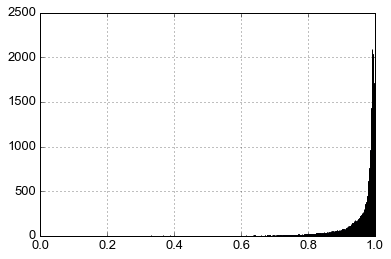

In [34]:
test_d[ test_d.WW == 1 ].pred.hist(bins=1000)

In [46]:
for process in scales.keys():
    if process in test_d.keys():
        print process, test_d[ (test_d[process] == 1) & (test_d.pred > .987929)].shape[0] *  scales[process]

TT 136.106315585
WW 3798.55271453
ZZ 27.15321
DY 661.355072802
WZ 193.81085


## Same Flavor

In [16]:
clf_s = clf_s.fit( np.float32(train_s[features].values) , np.float32(labels_s), sample_weight=weights_s)

In [17]:
print clf_s.score(np.float32(train_s[features].values), np.float32(labels_s), weights_s)

0.962835245412


In [18]:
pred_s = clf_s.predict_proba(np.float32(test_s[features].values))

In [19]:
test_s["pred"] = pred_s[:,0]

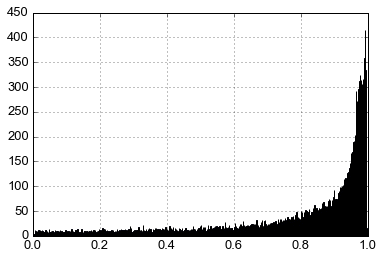

In [20]:
test_s[ test_s.WW == 1 ].pred.hist(bins=1000)

In [ ]:
test_s[ (test_s.WW == 1) & (test_s.pred > .98062)].shape[0] * 0.25432195464148893

In [29]:
for process in scales.keys():
    if process in test_s.keys():
        print process, test_s[ (test_s[process] == 1) & (test_s.pred > .9742)].shape[0] *  scales[process]

TT 71.3255454722
WW 1684.62862755
ZZ 67.44507
DY 557.877748486
WZ 125.214875


## same + different flavors

In [15]:
clf = clf.fit( np.float32(train[features].values) , np.float32(labels), sample_weight=weights)

In [32]:
print clf.score(np.float32(train[features].values), np.float32(labels), weights)

0.961823529412


In [16]:
pred = clf.predict_proba(np.float32(df[features].values))

In [34]:
df["pred"] = pred[:,0]

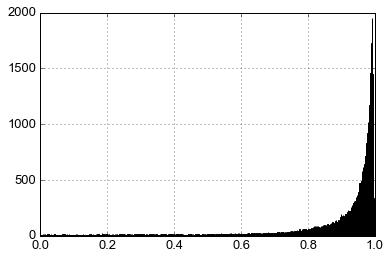

In [55]:
df[ df.WW == 1 ].pred.hist(bins=1000)

In [36]:

scales = {"WW": 19.7e3 * 59.8 /  10000431.0 ,\
          "DY": 19.7e3 * 3531.9 / 30459500. ,\
          "TT": 19.7e3 * 25.81 / 12011428.,\
          "ZZ": 19.7e3 * 9.03 / 9799908.,\
          "WZ": 19.7e3 * 1.07 / 2017979., "WJ": 1 }


for process in scales.keys():
    if process in df.keys():
        print process, df[ (df[process] == 1) & (df.pred > .96912) & (df.lep_Type > 0)].shape[0] *  scales[process],\
        df[ (df[process] == 1) & (df.pred > .96912) & (df.lep_Type < 0)].shape[0] *  scales[process]

TT 305.853610245 103.674244062
WW 3821.73461124 1266.56442707
ZZ 37.6287318207 40.7927629525
DY 1365.45077956 778.32943942
WZ 261.823028882 105.08718277


In [51]:
df.shape

(4848788, 40)

# Results as of sept 21 

### trained seperately:

Process:    | WW | DY | TT | ZZ+WZ
---         |---| ---|--- |---
same flavor |1684|395|71 | 192 
diff flavor |3799|661|139 | 220 

Significant differences

- diff DY 661 vs 106 
- diff TT 139 vs 433


### trained together:

Process:    | WW | DY | TT | ZZ+WZ
---         |---| ---|--- |---
same flavor |1057|182|36 | 101 
diff flavor |4426|485|178 | 279 